In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, \
                                 SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

from sklearn.feature_selection import SelectFromModel, \
                                      GenericUnivariateSelect
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold, train_test_split, \
                                    StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential

from xgboost import XGBClassifier, plot_importance

%matplotlib inline

In [23]:
dataframe = pd.read_csv("glass.csv")

In [24]:
dataframe.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [25]:
dataframe['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [26]:
dataframe.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [27]:
target = dataframe['Type']
dataframe = dataframe.drop('Type', axis=1)

In [28]:
dataframe.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [29]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [30]:
dataframe.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


In [31]:
X  = dataframe.as_matrix()
y = target.as_matrix()

In [32]:
X.shape

(214, 9)

In [33]:
y.shape

(214,)

In [34]:
def create_network():
    
    model = Sequential()
    
    model.add(Dense(32, activation='tanh', init='uniform', input_dim=X.shape[1]))
    model.add(Dense(18, activation='tanh', init='normal'))
    model.add(Dense(8, activation="sigmoid"))
    
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [35]:
estimator = KerasClassifier(build_fn=create_network, nb_epoch=50, batch_size=5, verbose=0, shuffle=True)

In [36]:
names = [
    'SVC',
    'LinearSVC',
    'KNeighborsClassifier',
    'GaussianNB',
    'MultinomialNB',
    'LogisticRegression',
    'RidgeClassifier',
    'SGDClassifier',
    'RandomForestClassifier',
    'AdaBoostClassifier',
    'GradientBoostingClassifier',
    'GaussianProcessClassifier',
    'DecisionTreeClassifier',
    'ExtraTreeClassifier',
    #'Neural Network'
]

classifiers = [
    SVC(C=2.0, kernel='sigmoid', tol=0.0001),
    LinearSVC(penalty='l2', loss='squared_hinge', intercept_scaling=1.5, tol=0.0001),
    KNeighborsClassifier(),
    GaussianNB(),
    MultinomialNB(alpha=1.3),
    LogisticRegression(tol=0.0001),
    RidgeClassifier(tol=0.0001),
    SGDClassifier(loss='modified_huber', penalty='elasticnet', n_jobs=-1),
    RandomForestClassifier(n_estimators=20, max_features='log2', min_samples_split=3,
                          bootstrap=True),
    AdaBoostClassifier(),
    GradientBoostingClassifier(learning_rate=0.01, n_estimators=250,
                              max_depth=5, min_samples_split=3, subsample=0.9, max_features='log2'),
    GaussianProcessClassifier(n_restarts_optimizer=2, max_iter_predict=250, n_jobs=4),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    #estimator
]

Accuracy: 80.0, F1 Score: 0.7727441640485119


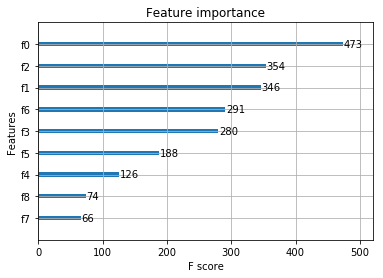

In [49]:
X = StandardScaler().fit_transform(X)
X = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
cv = StratifiedShuffleSplit(test_size=0.2)

model = XGBClassifier(objective='multi:softmax')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
delic = delic = f1_score(y_pred=y_pred, y_true=y_test, average="macro")
print("Accuracy: {0}, F1 Score: {1}".format(accuracy*100, delic))
thresholds = np.sort(model.feature_importances_)
plot_importance(model)


In [38]:
data_collected = []

for thresh in thresholds:
    selection = SelectFromModel(estimator=model, threshold=thresh, prefit=True)
    select_X = selection.transform(X)
    select_X_train = selection.transform(X_train)
    select_X_test = selection.transform(X_test)
    for name, classifier in zip(names, classifiers):
        shape = select_X.shape[1]
        print("Using classifier: {0}, Shape of data: {1}, Thresh: {2}".format(name, shape, thresh))
        results = cross_val_score(classifier, select_X, y, cv=cv)
        print("Mean: {0}, Std: {1}".format(results.mean()*100, results.std()*100))
        classifier.fit(select_X_train, y_train)
        data_collected.append({'shape':shape, 'name':name, 'classifier':classifier, 'results':results})
        accuracy = accuracy_score(y_pred=classifier.predict(select_X_test), y_true=y_test)
        delic = f1_score(y_pred=classifier.predict(select_X_test), y_true=y_test, average="macro")
        print("Accuracy: {0}, F1 Score: {1}".format(accuracy*100, delic))
        print("\n##################################################\n")
    

Using classifier: SVC, Shape of data: 9, Thresh: 0.01617647148668766
Mean: 45.81395348837209, Std: 3.8983847940093517
Accuracy: 46.15384615384615, F1 Score: 0.24041025641025643

##################################################

Using classifier: LinearSVC, Shape of data: 9, Thresh: 0.01617647148668766
Mean: 59.06976744186046, Std: 3.919139429384353
Accuracy: 60.0, F1 Score: 0.3965034965034965

##################################################

Using classifier: KNeighborsClassifier, Shape of data: 9, Thresh: 0.01617647148668766
Mean: 66.04651162790698, Std: 7.368827682676677
Accuracy: 64.61538461538461, F1 Score: 0.4972164711295146

##################################################

Using classifier: GaussianNB, Shape of data: 9, Thresh: 0.01617647148668766
Mean: 46.97674418604652, Std: 7.906976744186048
Accuracy: 35.38461538461539, F1 Score: 0.38536922015182884

##################################################

Using classifier: MultinomialNB, Shape of data: 9, Thresh: 0.0161764

/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3

Mean: 49.302325581395344, Std: 7.339411087469534
Accuracy: 18.461538461538463, F1 Score: 0.14153846153846156

##################################################

Using classifier: RandomForestClassifier, Shape of data: 9, Thresh: 0.01617647148668766


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Mean: 74.65116279069768, Std: 4.5867634705386084
Accuracy: 72.3076923076923, F1 Score: 0.5595815295815295

##################################################

Using classifier: AdaBoostClassifier, Shape of data: 9, Thresh: 0.01617647148668766


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Mean: 44.18604651162791, Std: 6.064374330421068
Accuracy: 43.07692307692308, F1 Score: 0.3782795698924731

##################################################

Using classifier: GradientBoostingClassifier, Shape of data: 9, Thresh: 0.01617647148668766
Mean: 79.53488372093022, Std: 5.677467728248234
Accuracy: 75.38461538461539, F1 Score: 0.7245026831535025

##################################################

Using classifier: GaussianProcessClassifier, Shape of data: 9, Thresh: 0.01617647148668766
Mean: 59.06976744186046, Std: 3.919139429384355


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3

Accuracy: 61.53846153846154, F1 Score: 0.38731934731934736

##################################################

Using classifier: DecisionTreeClassifier, Shape of data: 9, Thresh: 0.01617647148668766
Mean: 67.90697674418605, Std: 6.96122304516082
Accuracy: 64.61538461538461, F1 Score: 0.5648363927980652

##################################################

Using classifier: ExtraTreeClassifier, Shape of data: 9, Thresh: 0.01617647148668766
Mean: 68.13953488372093, Std: 2.093023255813952
Accuracy: 61.53846153846154, F1 Score: 0.38948042985310066

##################################################

Using classifier: SVC, Shape of data: 8, Thresh: 0.0416666679084301
Mean: 47.90697674418604, Std: 3.919139429384351
Accuracy: 46.15384615384615, F1 Score: 0.24041025641025643

##################################################

Using classifier: LinearSVC, Shape of data: 8, Thresh: 0.0416666679084301
Mean: 61.16279069767442, Std: 7.992018733692829
Accuracy: 60.0, F1 Score: 0.32474747474747473



/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packa

Mean: 48.837209302325576, Std: 4.412480456048901
Accuracy: 52.307692307692314, F1 Score: 0.36551932367149764

##################################################

Using classifier: RandomForestClassifier, Shape of data: 8, Thresh: 0.0416666679084301


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Mean: 77.67441860465117, Std: 7.2205463703535
Accuracy: 72.3076923076923, F1 Score: 0.6016043254511108

##################################################

Using classifier: AdaBoostClassifier, Shape of data: 8, Thresh: 0.0416666679084301
Mean: 41.3953488372093, Std: 8.812695498370426
Accuracy: 50.76923076923077, F1 Score: 0.42215538847117795

##################################################

Using classifier: GradientBoostingClassifier, Shape of data: 8, Thresh: 0.0416666679084301


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Mean: 77.20930232558139, Std: 6.478320128922848
Accuracy: 72.3076923076923, F1 Score: 0.6515379590571407

##################################################

Using classifier: GaussianProcessClassifier, Shape of data: 8, Thresh: 0.0416666679084301
Mean: 58.13953488372092, Std: 5.303141512089015


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 61.53846153846154, F1 Score: 0.38731934731934736

##################################################

Using classifier: DecisionTreeClassifier, Shape of data: 8, Thresh: 0.0416666679084301
Mean: 68.6046511627907, Std: 6.7602055133714565
Accuracy: 61.53846153846154, F1 Score: 0.44517055048969945

##################################################

Using classifier: ExtraTreeClassifier, Shape of data: 8, Thresh: 0.0416666679084301
Mean: 62.32558139534884, Std: 6.96122304516082
Accuracy: 58.46153846153847, F1 Score: 0.4518666322454805

##################################################

Using classifier: SVC, Shape of data: 7, Thresh: 0.061274509876966476
Mean: 45.58139534883721, Std: 3.7786225137841676
Accuracy: 46.15384615384615, F1 Score: 0.24041025641025643

##################################################

Using classifier: LinearSVC, Shape of data: 7, Thresh: 0.061274509876966476
Mean: 60.930232558139544, Std: 4.509469634805887
Accuracy: 55.38461538461539, F1 Score: 0.30

/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packa

Mean: 40.46511627906977, Std: 9.197079038737296
Accuracy: 49.23076923076923, F1 Score: 0.2604323780794369

##################################################

Using classifier: RandomForestClassifier, Shape of data: 7, Thresh: 0.061274509876966476


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Mean: 76.97674418604652, Std: 5.036373913420398
Accuracy: 73.84615384615385, F1 Score: 0.681047302641987

##################################################

Using classifier: AdaBoostClassifier, Shape of data: 7, Thresh: 0.061274509876966476
Mean: 46.27906976744186, Std: 6.532359025668902
Accuracy: 52.307692307692314, F1 Score: 0.4272408293460924

##################################################

Using classifier: GradientBoostingClassifier, Shape of data: 7, Thresh: 0.061274509876966476
Mean: 77.67441860465117, Std: 4.054789714921557
Accuracy: 72.3076923076923, F1 Score: 0.65924388398166

##################################################

Using classifier: GaussianProcessClassifier, Shape of data: 7, Thresh: 0.061274509876966476
Mean: 60.930232558139544, Std: 4.743273966132822


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 53.84615384615385, F1 Score: 0.34359431825979553

##################################################

Using classifier: DecisionTreeClassifier, Shape of data: 7, Thresh: 0.061274509876966476
Mean: 67.90697674418607, Std: 5.282705437953742
Accuracy: 64.61538461538461, F1 Score: 0.5667580055877928

##################################################

Using classifier: ExtraTreeClassifier, Shape of data: 7, Thresh: 0.061274509876966476
Mean: 66.27906976744187, Std: 5.99711486429192
Accuracy: 61.53846153846154, F1 Score: 0.5352713178294574

##################################################

Using classifier: SVC, Shape of data: 6, Thresh: 0.07107843458652496
Mean: 48.604651162790695, Std: 3.1971458336901195
Accuracy: 46.15384615384615, F1 Score: 0.24041025641025643

##################################################

Using classifier: LinearSVC, Shape of data: 6, Thresh: 0.07107843458652496
Mean: 60.46511627906976, Std: 5.4041628086615106

/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3


Accuracy: 50.76923076923077, F1 Score: 0.3340976999513585

##################################################

Using classifier: KNeighborsClassifier, Shape of data: 6, Thresh: 0.07107843458652496
Mean: 71.3953488372093, Std: 4.656973115000182
Accuracy: 69.23076923076923, F1 Score: 0.462007021512217

##################################################

Using classifier: GaussianNB, Shape of data: 6, Thresh: 0.07107843458652496
Mean: 43.25581395348837, Std: 5.220917283870614
Accuracy: 50.76923076923077, F1 Score: 0.3550217898043985

##################################################

Using classifier: MultinomialNB, Shape of data: 6, Thresh: 0.07107843458652496
Mean: 35.8139534883721, Std: 1.139297554782873
Accuracy: 33.84615384615385, F1 Score: 0.1011494252873563

##################################################

Using classifier: LogisticRegression, Shape of data: 6, Thresh: 0.07107843458652496
Mean: 56.27906976744186, Std: 5.771941230693424
Accuracy: 47.69230769230769, F1 Score: 0.

/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Mean: 75.5813953488372, Std: 7.14903541811135
Accuracy: 66.15384615384615, F1 Score: 0.580952380952381

##################################################

Using classifier: AdaBoostClassifier, Shape of data: 6, Thresh: 0.07107843458652496
Mean: 41.3953488372093, Std: 11.757418288153058
Accuracy: 52.307692307692314, F1 Score: 0.4236118598382749

##################################################

Using classifier: GradientBoostingClassifier, Shape of data: 6, Thresh: 0.07107843458652496
Mean: 73.02325581395348, Std: 7.585816944325624
Accuracy: 72.3076923076923, F1 Score: 0.5449035562994999

##################################################

Using classifier: GaussianProcessClassifier, Shape of data: 6, Thresh: 0.07107843458652496


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Mean: 57.67441860465116, Std: 3.8635459827525933


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 52.307692307692314, F1 Score: 0.33535762483130904

##################################################

Using classifier: DecisionTreeClassifier, Shape of data: 6, Thresh: 0.07107843458652496
Mean: 69.76744186046511, Std: 6.064374330421068
Accuracy: 67.6923076923077, F1 Score: 0.5851989280560709

##################################################

Using classifier: ExtraTreeClassifier, Shape of data: 6, Thresh: 0.07107843458652496
Mean: 61.86046511627907, Std: 6.257499556778471
Accuracy: 66.15384615384615, F1 Score: 0.5244562647754137

##################################################

Using classifier: SVC, Shape of data: 5, Thresh: 0.11666666716337204
Mean: 49.76744186046512, Std: 4.4369265182183515
Accuracy: 46.15384615384615, F1 Score: 0.24041025641025643

##################################################

Using classifier: LinearSVC, Shape of data: 5, Thresh: 0.11666666716337204
Mean: 53.48837209302325, Std: 8.824960912097804
Accuracy: 52.307692307692314, F1 Score: 0.34

/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3

Mean: 45.34883720930233, Std: 11.309596665849142
Accuracy: 47.69230769230769, F1 Score: 0.34116770186335404

##################################################

Using classifier: RandomForestClassifier, Shape of data: 5, Thresh: 0.11666666716337204


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Mean: 74.88372093023257, Std: 6.135305096871124
Accuracy: 67.6923076923077, F1 Score: 0.5676967240797028

##################################################

Using classifier: AdaBoostClassifier, Shape of data: 5, Thresh: 0.11666666716337204
Mean: 46.97674418604652, Std: 3.0852323631213023
Accuracy: 53.84615384615385, F1 Score: 0.6152271060092389

##################################################

Using classifier: GradientBoostingClassifier, Shape of data: 5, Thresh: 0.11666666716337204
Mean: 72.7906976744186, Std: 4.034732923929646
Accuracy: 70.76923076923077, F1 Score: 0.5073696145124716

##################################################

Using classifier: GaussianProcessClassifier, Shape of data: 5, Thresh: 0.11666666716337204


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Mean: 59.76744186046512, Std: 5.887901814498679


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 52.307692307692314, F1 Score: 0.33535762483130904

##################################################

Using classifier: DecisionTreeClassifier, Shape of data: 5, Thresh: 0.11666666716337204
Mean: 69.76744186046511, Std: 5.303141512089013
Accuracy: 56.92307692307692, F1 Score: 0.4301418439716312

##################################################

Using classifier: ExtraTreeClassifier, Shape of data: 5, Thresh: 0.11666666716337204
Mean: 60.69767441860465, Std: 5.449011401795341
Accuracy: 63.07692307692307, F1 Score: 0.448265042451089

##################################################

Using classifier: SVC, Shape of data: 4, Thresh: 0.12254901975393295
Mean: 53.25581395348837, Std: 6.104374301584508
Accuracy: 47.69230769230769, F1 Score: 0.25938714634366805

##################################################

Using classifier: LinearSVC, Shape of data: 4, Thresh: 0.12254901975393295
Mean: 64.18604651162792, Std: 4.313310928137537
Accuracy: 55.38461538461539, F1 Score: 0.3551

/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda

Mean: 41.86046511627907, Std: 8.385002966195325
Accuracy: 46.15384615384615, F1 Score: 0.24041025641025643

##################################################

Using classifier: RandomForestClassifier, Shape of data: 4, Thresh: 0.12254901975393295


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Mean: 74.65116279069768, Std: 7.814091914609972
Accuracy: 67.6923076923077, F1 Score: 0.5347338935574231

##################################################

Using classifier: AdaBoostClassifier, Shape of data: 4, Thresh: 0.12254901975393295
Mean: 43.488372093023266, Std: 5.308238237448059
Accuracy: 46.15384615384615, F1 Score: 0.4345567476002259

##################################################

Using classifier: GradientBoostingClassifier, Shape of data: 4, Thresh: 0.12254901975393295


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Mean: 73.72093023255812, Std: 4.993235012461369
Accuracy: 67.6923076923077, F1 Score: 0.4538775510204082

##################################################

Using classifier: GaussianProcessClassifier, Shape of data: 4, Thresh: 0.12254901975393295


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Mean: 61.16279069767442, Std: 6.415401964713359


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 56.92307692307692, F1 Score: 0.36325008325008323

##################################################

Using classifier: DecisionTreeClassifier, Shape of data: 4, Thresh: 0.12254901975393295
Mean: 66.97674418604652, Std: 5.38411018734429
Accuracy: 55.38461538461539, F1 Score: 0.4097348685583979

##################################################

Using classifier: ExtraTreeClassifier, Shape of data: 4, Thresh: 0.12254901975393295
Mean: 65.58139534883722, Std: 5.282705437953743
Accuracy: 60.0, F1 Score: 0.37864313596129523

##################################################

Using classifier: SVC, Shape of data: 3, Thresh: 0.12401960790157318
Mean: 46.04651162790698, Std: 3.2558139534883708
Accuracy: 44.61538461538462, F1 Score: 0.23203203203203207

##################################################

Using classifier: LinearSVC, Shape of data: 3, Thresh: 0.12401960790157318
Mean: 51.86046511627907, Std: 4.166621597016027
Accuracy: 55.38461538461539, F1 Score: 0.3565571683218742

/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda

Mean: 40.69767441860465, Std: 9.714697011258336
Accuracy: 46.15384615384615, F1 Score: 0.3098803492219009

##################################################

Using classifier: RandomForestClassifier, Shape of data: 3, Thresh: 0.12401960790157318


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Mean: 71.3953488372093, Std: 4.656973115000182
Accuracy: 66.15384615384615, F1 Score: 0.5031200031200032

##################################################

Using classifier: AdaBoostClassifier, Shape of data: 3, Thresh: 0.12401960790157318


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Mean: 44.651162790697676, Std: 7.26534853572712
Accuracy: 43.07692307692308, F1 Score: 0.2797979797979798

##################################################

Using classifier: GradientBoostingClassifier, Shape of data: 3, Thresh: 0.12401960790157318
Mean: 74.18604651162791, Std: 7.951312091757562
Accuracy: 67.6923076923077, F1 Score: 0.5026807760141093

##################################################

Using classifier: GaussianProcessClassifier, Shape of data: 3, Thresh: 0.12401960790157318


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Mean: 51.86046511627907, Std: 8.579472904975217


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3

Accuracy: 50.76923076923077, F1 Score: 0.32634577897735795

##################################################

Using classifier: DecisionTreeClassifier, Shape of data: 3, Thresh: 0.12401960790157318
Mean: 68.6046511627907, Std: 4.79430886699728
Accuracy: 63.07692307692307, F1 Score: 0.4842221270792699

##################################################

Using classifier: ExtraTreeClassifier, Shape of data: 3, Thresh: 0.12401960790157318
Mean: 64.65116279069768, Std: 7.190523178483864
Accuracy: 67.6923076923077, F1 Score: 0.46471306471306467

##################################################

Using classifier: SVC, Shape of data: 2, Thresh: 0.19558823108673096
Mean: 48.13953488372093, Std: 2.0930232558139537
Accuracy: 46.15384615384615, F1 Score: 0.2509783160170296

##################################################

Using classifier: LinearSVC, Shape of data: 2, Thresh: 0.19558823108673096
Mean: 52.093023255813954, Std: 3.6326742678635595
Accuracy: 55.38461538461539, F1 Score: 0.3534

/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Mean: 39.76744186046511, Std: 12.413028972169785
Accuracy: 47.69230769230769, F1 Score: 0.2119047619047619

##################################################

Using classifier: RandomForestClassifier, Shape of data: 2, Thresh: 0.19558823108673096


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Mean: 68.13953488372093, Std: 5.887901814498682
Accuracy: 56.92307692307692, F1 Score: 0.41553287981859405

##################################################

Using classifier: AdaBoostClassifier, Shape of data: 2, Thresh: 0.19558823108673096


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Mean: 41.86046511627907, Std: 9.8116386556879
Accuracy: 40.0, F1 Score: 0.3200206398348813

##################################################

Using classifier: GradientBoostingClassifier, Shape of data: 2, Thresh: 0.19558823108673096


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Mean: 70.93023255813954, Std: 4.1925014830976615
Accuracy: 63.07692307692307, F1 Score: 0.4897443826015255

##################################################

Using classifier: GaussianProcessClassifier, Shape of data: 2, Thresh: 0.19558823108673096


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Mean: 52.093023255813954, Std: 5.99260405894192


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3

Accuracy: 50.76923076923077, F1 Score: 0.3276537735074321

##################################################

Using classifier: DecisionTreeClassifier, Shape of data: 2, Thresh: 0.19558823108673096
Mean: 61.395348837209305, Std: 5.620021383067243
Accuracy: 52.307692307692314, F1 Score: 0.3842528272760832

##################################################

Using classifier: ExtraTreeClassifier, Shape of data: 2, Thresh: 0.19558823108673096
Mean: 63.95348837209303, Std: 6.432240319041549
Accuracy: 53.84615384615385, F1 Score: 0.42037037037037045

##################################################

Using classifier: SVC, Shape of data: 1, Thresh: 0.250980406999588
Mean: 34.88372093023256, Std: 5.551115123125783e-15
Accuracy: 33.84615384615385, F1 Score: 0.1011494252873563

##################################################

Using classifier: LinearSVC, Shape of data: 1, Thresh: 0.250980406999588
Mean: 31.16279069767442, Std: 3.480611522580411
Accuracy: 32.30769230769231, F1 Score: 0.122

/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda

Mean: 26.279069767441865, Std: 11.442711255946552
Accuracy: 35.38461538461539, F1 Score: 0.1701830863121186

##################################################

Using classifier: RandomForestClassifier, Shape of data: 1, Thresh: 0.250980406999588


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Mean: 48.372093023255815, Std: 9.173526941077219
Accuracy: 38.46153846153847, F1 Score: 0.23248644986449862

##################################################

Using classifier: AdaBoostClassifier, Shape of data: 1, Thresh: 0.250980406999588


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Mean: 46.74418604651163, Std: 4.344544579597534
Accuracy: 38.46153846153847, F1 Score: 0.25943994601889336

##################################################

Using classifier: GradientBoostingClassifier, Shape of data: 1, Thresh: 0.250980406999588


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Mean: 50.0, Std: 9.54622127989479
Accuracy: 38.46153846153847, F1 Score: 0.20278347195714833

##################################################

Using classifier: GaussianProcessClassifier, Shape of data: 1, Thresh: 0.250980406999588


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Mean: 32.79069767441861, Std: 3.023255813953489
Accuracy: 32.30769230769231, F1 Score: 0.09767441860465118

##################################################

Using classifier: DecisionTreeClassifier, Shape of data: 1, Thresh: 0.250980406999588
Mean: 46.51162790697675, Std: 3.120094852325287
Accuracy: 38.46153846153847, F1 Score: 0.20278347195714833

##################################################

Using classifier: ExtraTreeClassifier, Shape of data: 1, Thresh: 0.250980406999588
Mean: 45.34883720930233, Std: 5.014850849499494
Accuracy: 38.46153846153847, F1 Score: 0.23839586339586338

##################################################



/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [40]:
network_data = []

for thresh in thresholds:
    selection = SelectFromModel(estimator=model, threshold=thresh, prefit=True)
    select_X = selection.transform(X)
    select_X_train = selection.transform(X_train)
    select_X_test = selection.transform(X_test)
    shape = select_X.shape[1]
    def create_network():
    
        model = Sequential()

        model.add(Dense(32, activation='tanh', init='uniform', input_dim=shape))
        model.add(Dense(18, activation='tanh', init='normal'))
        model.add(Dense(8, activation="sigmoid"))

        model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
    estimator = KerasClassifier(build_fn=create_network, nb_epoch=50, batch_size=5, verbose=0, shuffle=True)
    print("Using neural network, Shape of data: {0}, Thresh: {1}".format(shape, thresh))
    results = cross_val_score(estimator, select_X, y, cv=cv)
    print("Mean: {0}, Std: {1}".format(results.mean()*100, results.std()*100))
    network_data.append({"shape":shape, "results":results})
    estimator.fit(select_X_train, y_train)
    accuracy = accuracy_score(y_pred=estimator.predict(select_X_test), y_true=y_test)
    delic = f1_score(y_pred=estimator.predict(select_X_test), y_true=y_test, average="macro")
    print("Accuracy: {0}, F1 Score: {1}".format(accuracy*100, delic))
    print("\n##################################################\n")

Using neural network, Shape of data: 9, Thresh: 0.01617647148668766
Mean: 49.06976869633031, Std: 5.54737698138032


/home/kinshiryuu/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 44.61538461538462, F1 Score: 0.23814541622760804

##################################################

Using neural network, Shape of data: 8, Thresh: 0.0416666679084301
Mean: 45.813954593830324, Std: 2.337180307006648
Accuracy: 33.84615384615385, F1 Score: 0.1436399217221135

##################################################

Using neural network, Shape of data: 7, Thresh: 0.061274509876966476
Mean: 48.37209428119105, Std: 6.961223239192066
Accuracy: 43.07692307692308, F1 Score: 0.2677777777777778

##################################################

Using neural network, Shape of data: 6, Thresh: 0.07107843458652496
Mean: 45.81395466660344, Std: 3.1287498917244987
Accuracy: 35.38461538461539, F1 Score: 0.18055555555555555

##################################################

Using neural network, Shape of data: 5, Thresh: 0.11666666716337204
Mean: 45.813954534918764, Std: 4.539353883138751
Accuracy: 43.07692307692308, F1 Score: 0.2326659641728135

############################

In [42]:
data_collected = sorted(data_collected, key=lambda k: k['results'].mean())
network_data = sorted(network_data, key=lambda k:k['results'].mean())


In [45]:
for data in data_collected:
    print(data['results'].mean())
    
data_collected[-1]

0.262790697674
0.311627906977
0.318604651163
0.320930232558
0.327906976744
0.346511627907
0.348837209302
0.348837209302
0.348837209302
0.355813953488
0.358139534884
0.358139534884
0.358139534884
0.381395348837
0.390697674419
0.397674418605
0.404651162791
0.406976744186
0.413953488372
0.413953488372
0.418604651163
0.418604651163
0.418604651163
0.43023255814
0.432558139535
0.43488372093
0.441860465116
0.444186046512
0.446511627907
0.446511627907
0.453488372093
0.453488372093
0.455813953488
0.458139534884
0.460465116279
0.460465116279
0.462790697674
0.46511627907
0.467441860465
0.46976744186
0.46976744186
0.479069767442
0.479069767442
0.479069767442
0.481395348837
0.483720930233
0.486046511628
0.488372093023
0.493023255814
0.493023255814
0.493023255814
0.493023255814
0.497674418605
0.5
0.511627906977
0.518604651163
0.518604651163
0.518604651163
0.520930232558
0.520930232558
0.523255813953
0.525581395349
0.532558139535
0.53488372093
0.537209302326
0.537209302326
0.539534883721
0.5511627906

{'classifier': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.01, loss='deviance', max_depth=5,
               max_features='log2', max_leaf_nodes=None,
               min_impurity_split=1e-07, min_samples_leaf=1,
               min_samples_split=3, min_weight_fraction_leaf=0.0,
               n_estimators=250, presort='auto', random_state=None,
               subsample=0.9, verbose=0, warm_start=False),
 'name': 'GradientBoostingClassifier',
 'results': array([ 0.81395349,  0.79069767,  0.8372093 ,  0.65116279,  0.79069767,
         0.86046512,  0.8372093 ,  0.8372093 ,  0.76744186,  0.76744186]),
 'shape': 9}

In [47]:
for data in network_data:
    print(data['results'].mean())

network_data[-1]

0.348837218035
0.444186056596
0.444186058259
0.458139545349
0.458139545938
0.458139546666
0.476744196893
0.483720942812
0.490697686963


{'results': array([ 0.58139537,  0.44186048,  0.44186048,  0.58139536,  0.46511629,
         0.46511629,  0.51162792,  0.41860466,  0.46511629,  0.53488373]),
 'shape': 9}